# Welles Wilder’s Smoothing Average (WWS)

https://www.tradingtechnologies.com/xtrader-help/x-study/technical-indicator-definitions/welles-wilders-smoothing-average-wws/

http://etfhq.com/blog/2010/08/19/wilders-smoothing/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
n = 14
df['WSMA'] = (df['Adj Close'].rolling(n).sum())/n
df['WWS'] = (df['Adj Close'].rolling(n).sum()-df['WSMA']+df['Adj Close'])/n
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,WSMA,WWS
Date,,,,,,,,
2018-08-20,218.100006,219.179993,215.110001,215.460007,213.793930,30287700,207.445909,207.899339
2018-08-21,216.800003,217.190002,214.029999,215.039993,213.377167,26159800,208.455486,208.807034
2018-08-22,214.100006,216.360001,213.839996,215.050003,213.387085,19018100,209.049769,209.359577
2018-08-23,214.649994,217.050003,214.600006,215.490005,213.823685,18883200,209.632859,209.932204
2018-08-24,216.600006,216.899994,215.110001,216.160004,214.488495,18476400,210.187158,210.494396


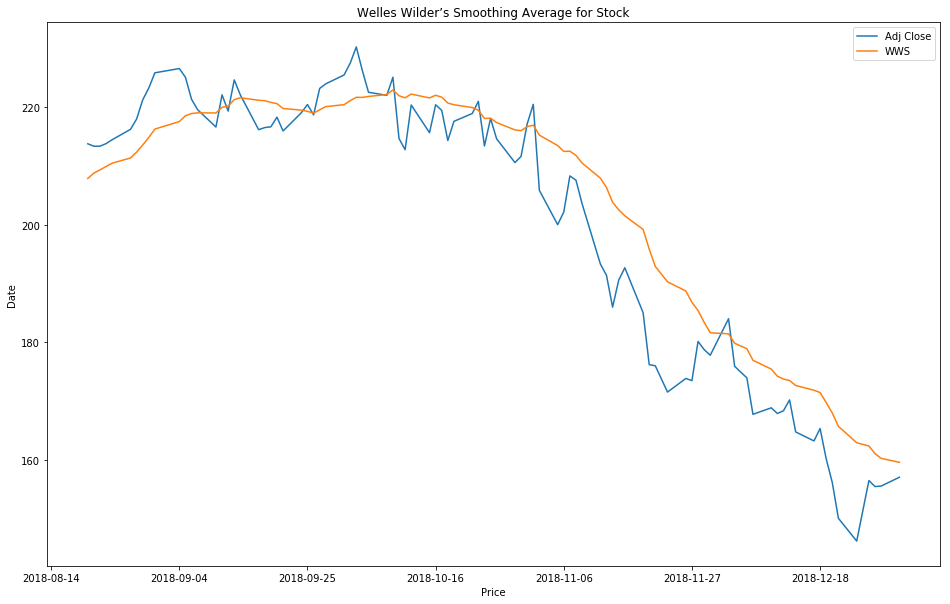

In [4]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['WWS'])
plt.title('Welles Wilder’s Smoothing Average for Stock')
plt.legend(loc='best')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

## Candlestick with WWS

In [5]:
from matplotlib import dates as mdates
import datetime as dt


df['VolumePositive'] = df['Open'] < df['Adj Close']
df = df.dropna()
df = df.reset_index()
df['Date'] = mdates.date2num(df['Date'].astype(dt.date))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,WSMA,WWS,VolumePositive
0,736926.0,218.100006,219.179993,215.110001,215.460007,213.793930,30287700,207.445909,207.899339,False
1,736927.0,216.800003,217.190002,214.029999,215.039993,213.377167,26159800,208.455486,208.807034,False
2,736928.0,214.100006,216.360001,213.839996,215.050003,213.387085,19018100,209.049769,209.359577,False
3,736929.0,214.649994,217.050003,214.600006,215.490005,213.823685,18883200,209.632859,209.932204,False
4,736930.0,216.600006,216.899994,215.110001,216.160004,214.488495,18476400,210.187158,210.494396,False


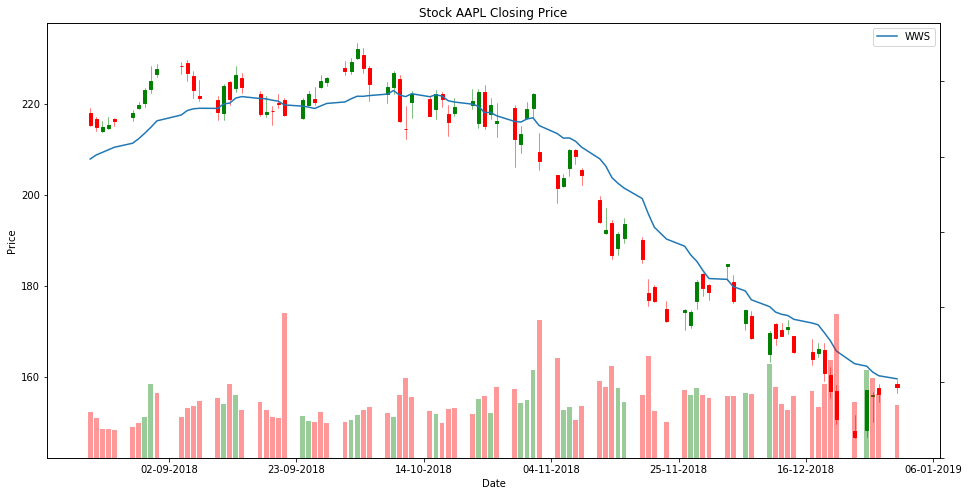

In [6]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['WWS'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')